In [46]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D,BatchNormalization

In [47]:
from PIL import Image
image_data = []
labels = []
classes = 43
cur_path = "DataSet/Train"

for i in range(classes):
    path = os.path.join('DataSet/Train', str(i))
    images = os.listdir(path)
#DataSet/Train
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            image_data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#lists into numpy arrays

image_data = np.array(image_data)
labels = np.array(labels)

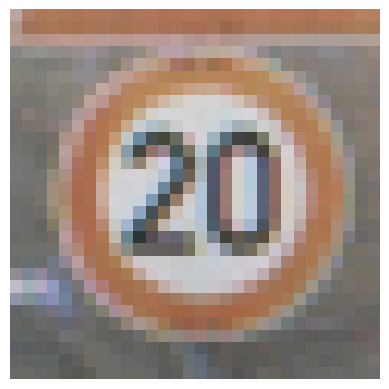

In [48]:

# Display the sample image
plt.imshow(image_data[0])
plt.axis('off')
plt.show()

## split the Data

In [49]:
print(image_data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2,shuffle=True, random_state=23)

In [51]:
# OneHotEncoding for the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [52]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

print("y_train: ", y_train.shape)
print("y_test ", y_test.shape)

X_train:  (31367, 30, 30, 3)
X_test:  (7842, 30, 30, 3)
y_train:  (31367, 43)
y_test  (7842, 43)


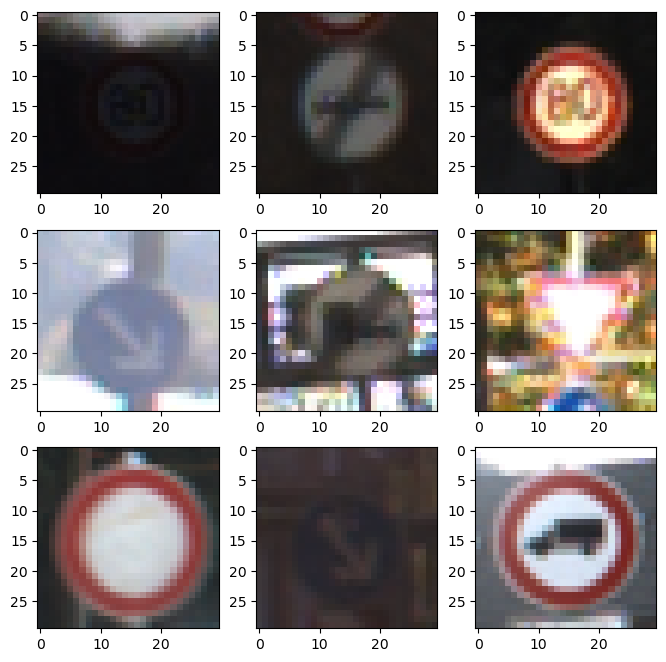

In [53]:
plt.figure(figsize=(8, 8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])

plt.show()

In [54]:
model = Sequential([
    # the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),

    # 1st hidden layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    # 2nd hidden layer
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # 3rd hidden layer
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # the output layer
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,747 (1.67 MB)

 Trainable params: 436,235 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

early_stoping = EarlyStopping(
    monitor = 'val_accuracy', 
    patience = 5 )


history = model.fit(X_train, y_train, batch_size=100, 
                    epochs=30, validation_data=(X_test, y_test), 
                    callbacks=[early_stoping],verbose=1)

Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 27s 82ms/step - accuracy: 0.4210 - loss: 2.3642 - val_accuracy: 0.9458 - val_loss: 0.3290
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9322 - loss: 0.2773 - val_accuracy: 0.9865 - val_loss: 0.0722
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.9723 - loss: 0.1178 - val_accuracy: 0.9916 - val_loss: 0.0464
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.9791 - loss: 0.0826 - val_accuracy: 0.9954 - val_loss: 0.0244
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.9866 - loss: 0.0549 - val_accuracy: 0.9955 - val_loss: 0.0200
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9891 - loss: 0.0424 - val_accuracy: 0.9969 - val_loss: 0.0162
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.9927 - loss: 0.0297 - val_accuracy: 0.9962 - val_loss: 0.0179
Epoch 8/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9884 - loss: 0.0395 -

In [57]:
# evaluate the model
model.evaluate(X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9964 - loss: 0.0114


[0.011203394271433353, 0.9969395399093628]

In [58]:
y_true = pd.read_csv('DataSet/Test.csv')
image_labels = y_true['ClassId'].values
image_path = y_true['Path'].values

data = []

for img in image_path:
    image = Image.open('./DataSet/' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))


X_test = np.array(data)
y_pred = np.argmax(model.predict(X_test), axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [59]:
print(f"Accuracy: {accuracy_score(image_labels, y_pred)*100:.3f}")

Accuracy: 97.617


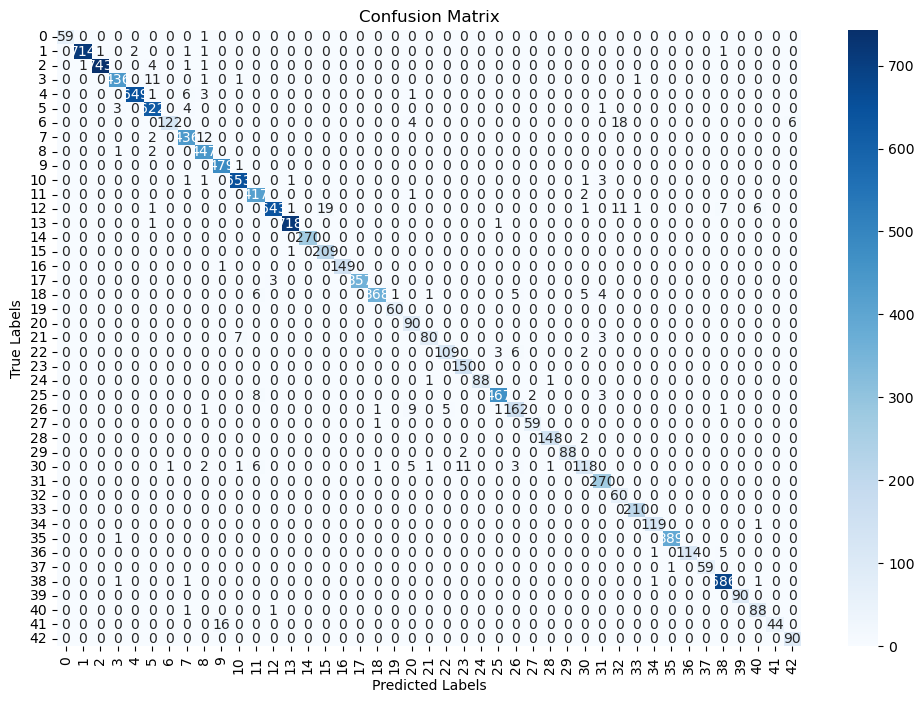

In [60]:
conf_matrix = confusion_matrix(image_labels, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [61]:
print(classification_report(image_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       1.00      0.99      1.00       720
           2       1.00      0.99      0.99       750
           3       0.99      0.97      0.98       450
           4       1.00      0.98      0.99       660
           5       0.97      0.99      0.98       630
           6       0.99      0.81      0.89       150
           7       0.97      0.97      0.97       450
           8       0.95      0.99      0.97       450
           9       0.97      1.00      0.98       480
          10       0.98      0.99      0.99       660
          11       0.95      0.99      0.97       420
          12       0.99      0.93      0.96       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.92      1.00      0.95       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [62]:
history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']


epochs = range(1, len(train_loss) + 1)

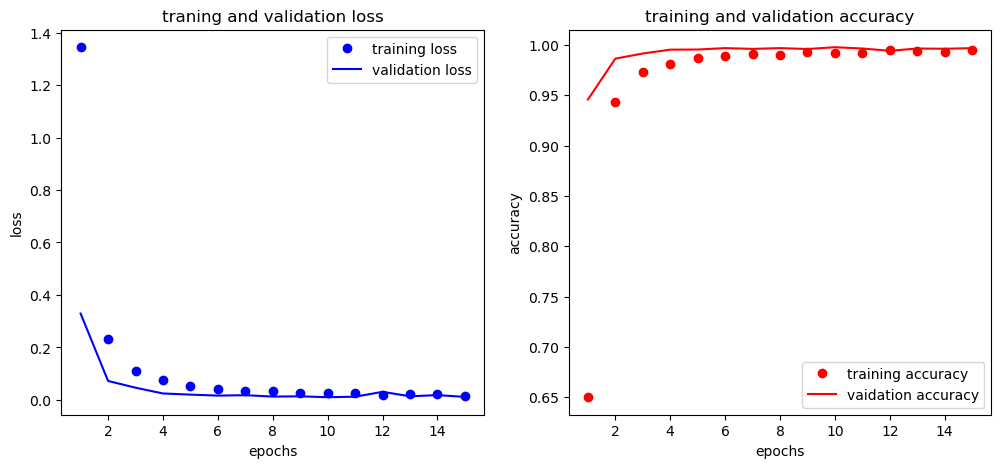

In [65]:
plt.figure(figsize=(12, 5))

# traning and validation loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')

plt.title("traning and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


# training and validation accuracy values
plt.subplot(1, 2, 2)

plt.plot(epochs, train_accuracy, 'ro', label='training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='vaidation accuracy')

plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()